### SVM

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-39-SVM.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-39-SVM.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X, y = iris.data, iris.target

In [ ]:
X2 = X[:, :2]

Text(0, 0.5, 'Sepal width')

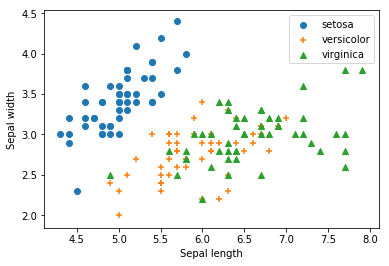

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.7)

Text(0, 0.5, 'Sepal width')

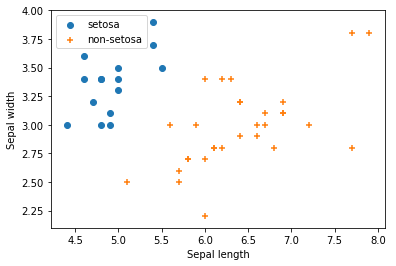

In [ ]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_

In [ ]:
clf.score(X_test, y_test)

0.9904761904761905

## SVM

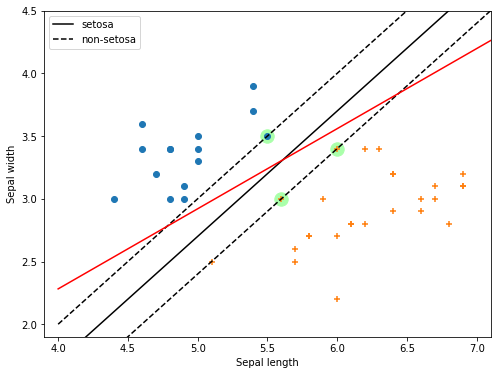

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)
plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 


plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")
markers = ['o', '+', '^'] 
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i] 
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa'] 
plt.legend(binary_names)
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
# 선형분류 결정 경계선
plt.plot(XX, (-a/b * XX + -c/b), "r-")

In [ ]:
svm_clf.score(X_test, y_test)

1.0

In [ ]:
svs

array([[5.5, 3.5],
       [6. , 3.4],
       [5.6, 3. ]])

## 커널 기법

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(SVC(kernel='rbf', C=1000, gamma=0.1,probability=True))
classifier = classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

In [ ]:
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9809523809523809

In [ ]:
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)
print("SVM score:", svm_clf.score(X_test, y_test))

SVM score: 0.9809523809523809
